In [770]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import GridSearchCV

In [3]:
path='../论文/FD-PASS_data_NatComm.xlsx'

In [4]:
data = pd.read_excel(r'../论文/FD-PASS_data_NatComm.xlsx')  #get all values in the form
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Morphological,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Case ID,Cerebral,Age,Gender,Max Diam,Depth,Neck Width,Aspect,Sac Volume,Sac Surface,...,SYSTOLE,NaN,DIASTOLE,NaN,TAV,NaN,SYSTOLE,NaN,DIASTOLE,NaN
3,NaN,hemisphere,NaN,f=1,[mm],[mm],[mm],Ratio,[mm3],[mm2],...,NaN,NaN,NaN,NaN,ANEURYSM NECK,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,aneuMaxSysVel [m/s],aneuSavSysVel [m/s],aneuMaxDiaVel [m/s],aneuSavDiaVel [m/s],neckMaxTavVel [m/s],neckInflowTav [mL/min],neckMaxSysVel [m/s],neckInflowSys [mL/min],neckMaxDiaVel [m/s],neckInflowDia [mL/min]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,ASD_0029,Right,45,1,7.723138,5.9165,5.195303,1.138817,132.607463,115.56308,...,36.256466,52.604611,47.087217,42.457123,35.639508,29.236669,36.256466,35.803017,59.656438,67.000721
83,ASD_0030,Left,52,1,9.909461,6.773713,5.849407,1.158017,214.863352,163.810806,...,37.978218,47.586207,47.230947,45.643295,27.590972,45.652174,37.978218,41.840796,47.627986,65.698668
84,ASD_0046,Right,53,1,3.487241,3.366698,4.502858,0.74768,44.381335,53.401617,...,41.510553,61.321675,86.60401,84.632296,59.891998,55.361025,41.510553,38.156566,86.60401,80.481393
85,ASD_0048,Left,59,1,8.06586,5.675744,4.626841,1.226699,92.766137,94.455824,...,15.927273,51.296089,68.816821,54.196776,28.479418,40.247368,17.559429,37.671233,68.772305,57.256637


In [5]:
op=data.iloc[5:,62:63] #op is the output
op.columns=['target']
op

,target
5,70.834749
6,54.700032
7,64.013742
8,42.168968
9,23.026044
...,...
82,69.47009
83,66.000799
84,76.987952
85,57.779767


In [6]:
name1=pd.DataFrame(data.iloc[2:3,2:13])
name1.index=['1']

In [7]:
name2=pd.DataFrame(data.iloc[4:5,13:25])
name2.index=['1']

In [8]:
name=name1.join(name2)
col=name.values.tolist()[0] #get the columns' index of the input data
col

['Age',
 'Gender',
 'Max Diam',
 'Depth',
 'Neck Width',
 'Aspect',
 'Sac Volume',
 'Sac Surface',
 'Neck Surface',
 'Non-Spherecity',
 'Side Branch Diam',
 'aneuMaxTavVel [m/s]',
 'aneuSavTavVel [m/s]',
 'aneuMaxSysVel [m/s]',
 'aneuSavSysVel [m/s]',
 'aneuMaxDiaVel [m/s]',
 'aneuSavDiaVel [m/s]',
 'neckMaxTavVel [m/s]',
 'neckInflowTav [mL/min]',
 'neckMaxSysVel [m/s]',
 'neckInflowSys [mL/min]',
 'neckMaxDiaVel [m/s]',
 'neckInflowDia [mL/min]']

In [9]:
df1=data.iloc[5:,2:25]  #get the input values
df1.columns=col

In [10]:
features=df1.copy() #input data
features=pd.DataFrame(features,dtype=np.float64) #change the data type
features

,Age,Gender,Max Diam,Depth,Neck Width,Aspect,Sac Volume,Sac Surface,Neck Surface,Non-Spherecity,...,aneuMaxSysVel [m/s],aneuSavSysVel [m/s],aneuMaxDiaVel [m/s],aneuSavDiaVel [m/s],neckMaxTavVel [m/s],neckInflowTav [mL/min],neckMaxSysVel [m/s],neckInflowSys [mL/min],neckMaxDiaVel [m/s],neckInflowDia [mL/min]
5,53.0,1.0,6.271901,4.752478,4.129872,1.150757,68.762125,75.262078,11.870629,0.144019,...,0.6646,0.18890,0.2001,0.04937,0.3155,35.643396,0.6646,70.981132,0.2001,22.256604
6,54.0,0.0,5.185685,3.415747,4.034782,0.846575,39.599791,51.760595,10.735090,0.138471,...,1.6630,0.64110,0.5735,0.19430,0.8640,90.962264,1.6630,175.924528,0.5735,58.867925
7,49.0,1.0,5.088396,3.310098,4.418790,0.749096,33.604050,42.497948,14.202149,0.059482,...,1.3950,0.74450,0.4000,0.21230,0.5842,78.962264,1.2250,156.226415,0.4000,51.107547
8,63.0,1.0,8.755372,5.756581,4.977675,1.156480,103.502236,108.831290,17.110892,0.222524,...,1.1700,0.28040,0.3496,0.07584,0.5189,59.943396,1.1700,119.603774,0.3496,39.056604
9,63.0,1.0,11.060981,9.944018,4.391979,2.264132,457.856677,288.104200,13.178811,0.208573,...,1.8990,0.40760,0.7840,0.16450,1.0210,129.169811,1.8990,222.509434,0.7782,91.924528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,45.0,1.0,7.723138,5.916500,5.195303,1.138817,132.607463,115.563080,17.806041,0.136292,...,0.5046,0.14050,0.1719,0.04580,0.2570,36.939623,0.5046,75.000000,0.1719,25.505660
83,52.0,1.0,9.909461,6.773713,5.849407,1.158017,214.863352,163.810806,23.761108,0.159431,...,0.4151,0.07795,0.1427,0.03042,0.2150,34.313208,0.4151,62.264151,0.1427,23.671698
84,53.0,1.0,3.487241,3.366698,4.502858,0.747680,44.381335,53.401617,14.469356,0.099010,...,0.7718,0.36960,0.2670,0.09269,0.3969,46.160377,0.7718,99.169811,0.2670,28.947170
85,59.0,1.0,8.065860,5.675744,4.626841,1.226699,92.766137,94.455824,15.309854,0.167268,...,0.7649,0.24560,0.2694,0.06509,0.3910,36.118868,0.7531,78.226415,0.2694,24.877358


In [11]:
df=features.join(op)
df.index=list(range(82))
df=pd.DataFrame(df,dtype=np.float64) #change the data type
df

,Age,Gender,Max Diam,Depth,Neck Width,Aspect,Sac Volume,Sac Surface,Neck Surface,Non-Spherecity,...,aneuSavSysVel [m/s],aneuMaxDiaVel [m/s],aneuSavDiaVel [m/s],neckMaxTavVel [m/s],neckInflowTav [mL/min],neckMaxSysVel [m/s],neckInflowSys [mL/min],neckMaxDiaVel [m/s],neckInflowDia [mL/min],target
0,53.0,1.0,6.271901,4.752478,4.129872,1.150757,68.762125,75.262078,11.870629,0.144019,...,0.18890,0.2001,0.04937,0.3155,35.643396,0.6646,70.981132,0.2001,22.256604,70.834749
1,54.0,0.0,5.185685,3.415747,4.034782,0.846575,39.599791,51.760595,10.735090,0.138471,...,0.64110,0.5735,0.19430,0.8640,90.962264,1.6630,175.924528,0.5735,58.867925,54.700032
2,49.0,1.0,5.088396,3.310098,4.418790,0.749096,33.604050,42.497948,14.202149,0.059482,...,0.74450,0.4000,0.21230,0.5842,78.962264,1.2250,156.226415,0.4000,51.107547,64.013742
3,63.0,1.0,8.755372,5.756581,4.977675,1.156480,103.502236,108.831290,17.110892,0.222524,...,0.28040,0.3496,0.07584,0.5189,59.943396,1.1700,119.603774,0.3496,39.056604,42.168968
4,63.0,1.0,11.060981,9.944018,4.391979,2.264132,457.856677,288.104200,13.178811,0.208573,...,0.40760,0.7840,0.16450,1.0210,129.169811,1.8990,222.509434,0.7782,91.924528,23.026044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,45.0,1.0,7.723138,5.916500,5.195303,1.138817,132.607463,115.563080,17.806041,0.136292,...,0.14050,0.1719,0.04580,0.2570,36.939623,0.5046,75.000000,0.1719,25.505660,69.470090
78,52.0,1.0,9.909461,6.773713,5.849407,1.158017,214.863352,163.810806,23.761108,0.159431,...,0.07795,0.1427,0.03042,0.2150,34.313208,0.4151,62.264151,0.1427,23.671698,66.000799
79,53.0,1.0,3.487241,3.366698,4.502858,0.747680,44.381335,53.401617,14.469356,0.099010,...,0.36960,0.2670,0.09269,0.3969,46.160377,0.7718,99.169811,0.2670,28.947170,76.987952
80,59.0,1.0,8.065860,5.675744,4.626841,1.226699,92.766137,94.455824,15.309854,0.167268,...,0.24560,0.2694,0.06509,0.3910,36.118868,0.7531,78.226415,0.2694,24.877358,57.779767


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     82 non-null     float64
 1   Gender                  82 non-null     float64
 2   Max Diam                82 non-null     float64
 3   Depth                   82 non-null     float64
 4   Neck Width              82 non-null     float64
 5   Aspect                  82 non-null     float64
 6   Sac Volume              82 non-null     float64
 7   Sac Surface             82 non-null     float64
 8   Neck Surface            82 non-null     float64
 9   Non-Spherecity          82 non-null     float64
 10  Side Branch Diam        82 non-null     float64
 11  aneuMaxTavVel [m/s]     82 non-null     float64
 12  aneuSavTavVel [m/s]     82 non-null     float64
 13  aneuMaxSysVel [m/s]     82 non-null     float64
 14  aneuSavSysVel [m/s]     82 non-null     floa

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,82.0,54.695122,9.955071,36.000000,48.000000,53.000000,60.000000,85.000000
Gender,82.0,0.780488,0.416463,0.000000,1.000000,1.000000,1.000000,1.000000
Max Diam,82.0,9.057419,4.009894,3.487241,6.259519,8.014905,10.763694,25.503031
Depth,82.0,6.859111,3.839825,2.054161,4.175252,6.116799,8.420386,22.836467
Neck Width,82.0,5.473855,1.382980,4.034782,4.343903,4.997243,5.912134,9.821044
Aspect,82.0,1.246905,0.569500,0.414615,0.791166,1.157046,1.511016,3.235424
Sac Volume,82.0,299.523726,656.532060,14.538786,47.863196,104.574589,255.753242,5283.791355
Sac Surface,82.0,171.071333,210.051151,24.135118,57.958062,103.784370,193.347881,1488.155846
Neck Surface,82.0,21.635767,11.540750,10.616068,13.092343,17.448264,24.543749,60.894462
Non-Spherecity,82.0,0.159798,0.072503,0.029070,0.105339,0.163516,0.210543,0.349464


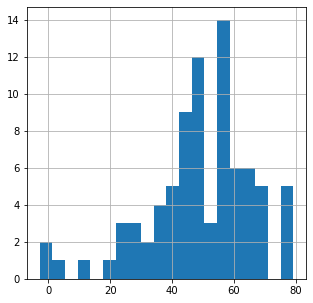

In [14]:
df['target'].hist(bins=20,figsize=(5,5)) #plot the data of output
plt.show()

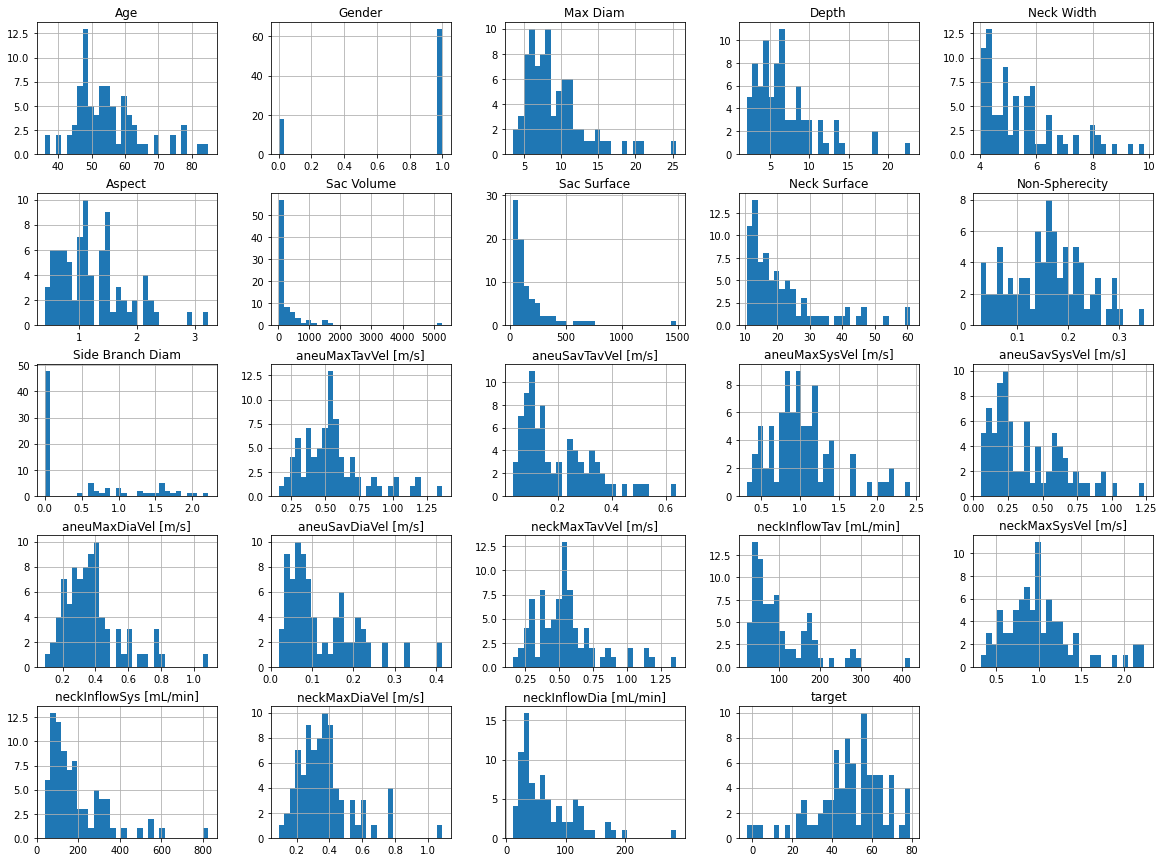

In [15]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

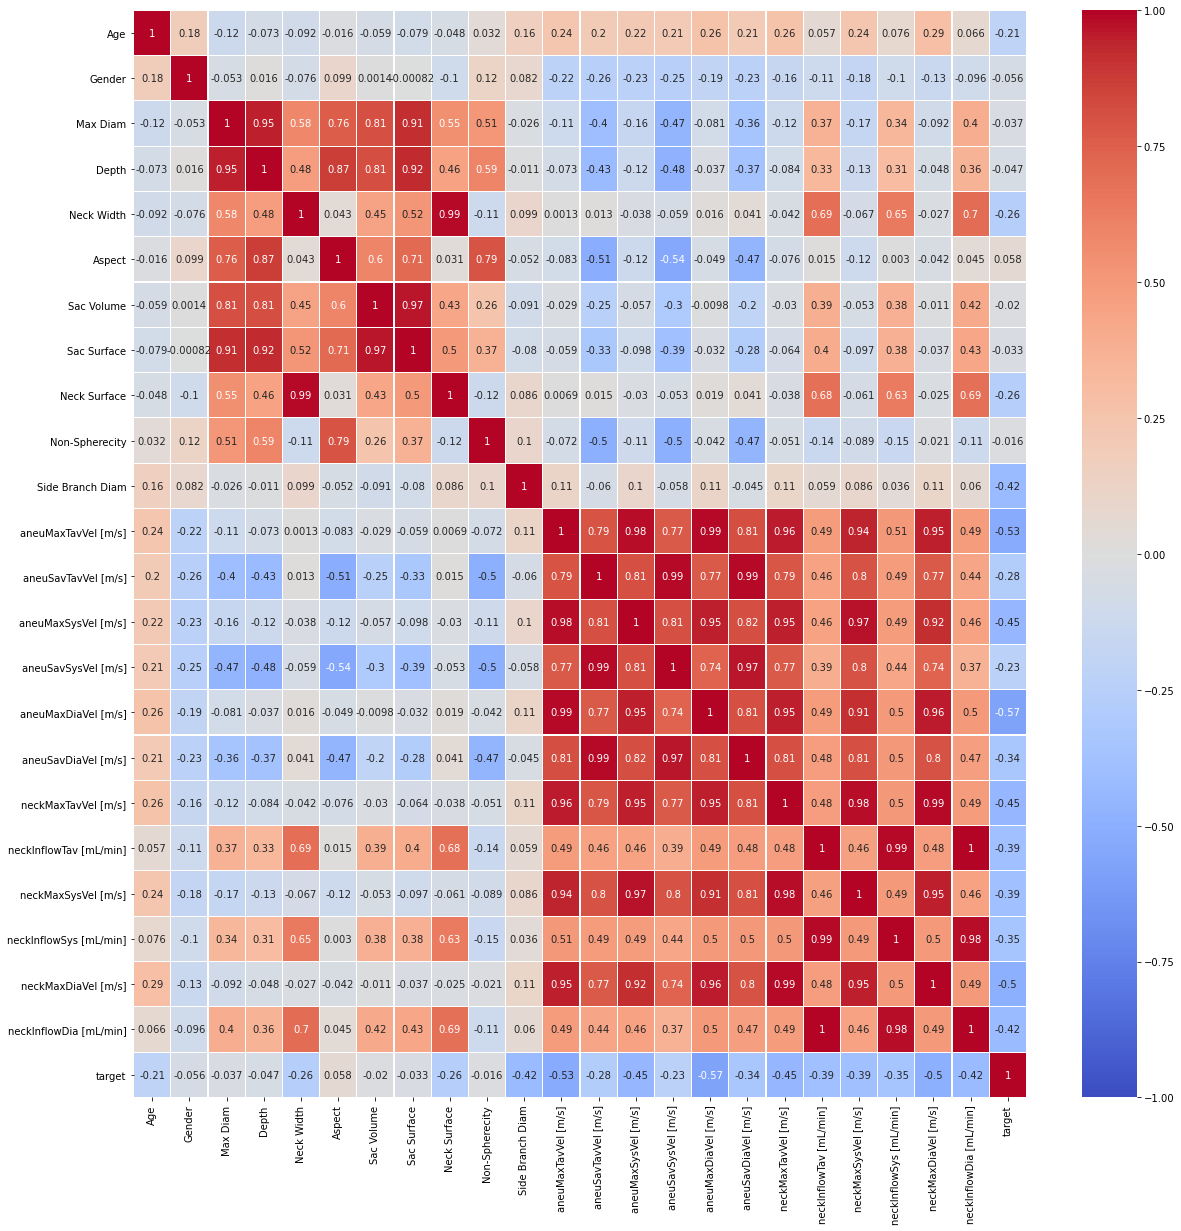

In [16]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(), vmin=-1, cmap='coolwarm', linewidths=0.1, annot=True)
plt.show()

In [17]:
target=df['target']
target

0     70.834749
1     54.700032
2     64.013742
3     42.168968
4     23.026044
        ...    
77    69.470090
78    66.000799
79    76.987952
80    57.779767
81     0.155642
Name: target, Length: 82, dtype: float64

In [18]:
class DataFrameSelector(BaseEstimator):
    
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
        
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [19]:
full_pipeline= Pipeline([
    ('selector', DataFrameSelector(col)),
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [20]:
prepared = full_pipeline.fit_transform(features)
prepared

array([[-0.17132511,  0.53033009, -0.69893596, ..., -0.86900706,
        -1.01265021, -0.92033633],
       [-0.07025562, -1.88561808, -0.97148691, ..., -0.12553616,
         1.19687762, -0.17412784],
       [-0.57560306,  0.53033009, -0.99589854, ..., -0.26508733,
         0.17022235, -0.33229913],
       ...,
       [-0.17132511,  0.53033009, -1.39765675, ..., -0.66930452,
        -0.61678141, -0.78396984],
       [ 0.43509182,  0.53033009, -0.24879975, ..., -0.8176779 ,
        -0.60257984, -0.86692037],
       [-0.67667255, -1.88561808,  0.2982135 , ...,  0.37933433,
        -0.64400109,  0.36695406]])

In [21]:
# labelencoder_y = LabelEncoder()
# target = labelencoder_y.fit_transform(target)
# target

In [517]:
#Split the data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(prepared, target, test_size=0.25)
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (61, 23)
y_train.shape: (61,)
x_test.shape: (21, 23)
y_test.shape: (21,)


**RF:**

In [533]:
#build model
forest_reg=RandomForestRegressor(max_features=20, n_estimators=50)
forest_reg.fit(x_train, y_train)

RandomForestRegressor(max_features=20, n_estimators=50)

5.217677907531878
30


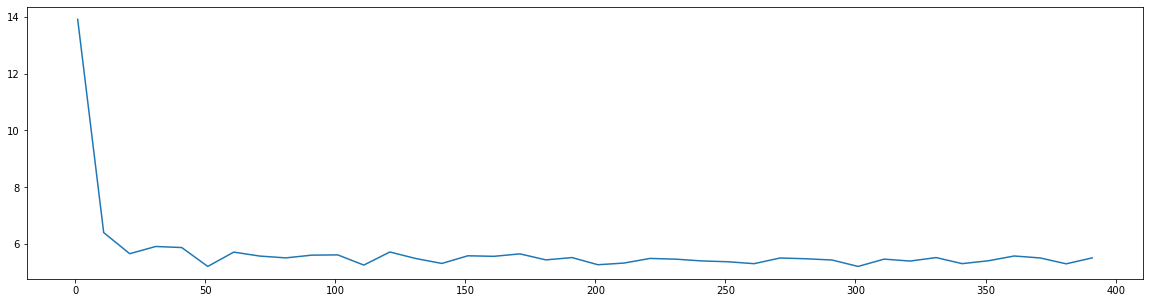

In [552]:
score1 = []
for i in range(0,400,10):
    rfc = RandomForestRegressor(n_estimators=i+1,max_features=20)
    rfc.fit(x_train, y_train)
    fore_predictions=rfc.predict(x_train)
    score=np.sqrt(mean_squared_error(y_train, fore_predictions))
    score1.append(score)
print(min(score1))
print(score1.index(min(score1)))
plt.figure(figsize=(20,5))
plt.plot(range(1,401,10),score1)
plt.show()

5.153038853229943
20


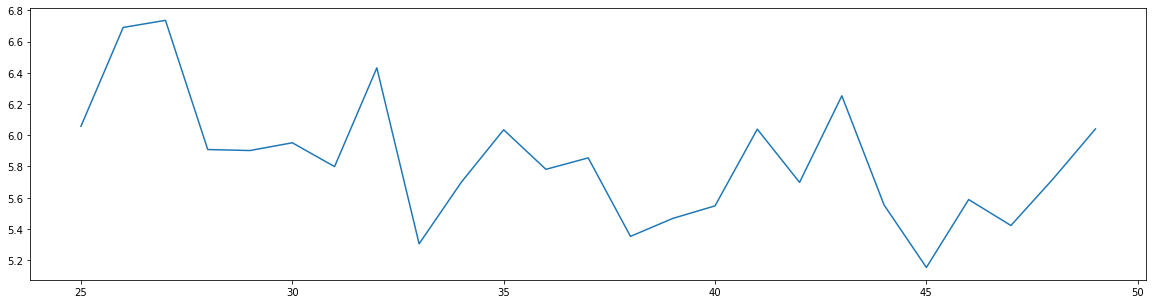

In [558]:
score2 = []
for i in range(25,50):
    rfc = RandomForestRegressor(n_estimators=i+1,max_features=20)
    rfc.fit(x_train, y_train)
    fore_predictions=rfc.predict(x_train)
    score=np.sqrt(mean_squared_error(y_train, fore_predictions))
    score2.append(score)
print(min(score2))
print(score2.index(min(score2)))
plt.figure(figsize=(20,5))
plt.plot(range(25,50),score2)
plt.show()

In [659]:
fore_parameters = {'max_depth':range(3,10), 'min_samples_split':range(2,20,2)}
forest_reg=RandomForestRegressor(n_estimators=46,max_features=20)
forest_reg.fit(x_train, y_train)
fore_GS = GridSearchCV(forest_reg, fore_parameters, cv=10,scoring='neg_mean_squared_error')
fore_GS.fit(x_train,y_train)
fore_GS.best_params_

{'max_depth': 9, 'min_samples_split': 4}

In [666]:
forest_reg=RandomForestRegressor(min_samples_split=4, n_estimators=46,max_depth=9,max_features=20)
forest_reg.fit(x_train, y_train)

forest_predictions=forest_reg.predict(x_train)
forest_score = forest_reg.score(x_train, y_train)
forest_mae=mean_absolute_error(y_train, forest_predictions)
forest_mse = mean_squared_error(y_train, forest_predictions)
forest_rsme=np.sqrt(forest_mse)

print('Random Forest score： ', forest_score)
print('Mean Absolute Error:', forest_mae)
print('Mean Squared Error:', forest_mse)
print('Root Mean Squared Error:', forest_rsme)

Random Forest score：  0.8608414205415359
Mean Absolute Error: 4.406314673805705
Mean Squared Error: 37.735619849896466
Root Mean Squared Error: 6.142932512236844


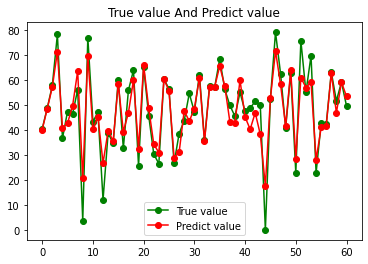

In [667]:
plt.figure()
plt.plot(np.arange(61), y_train, "go-", label="True value")
plt.plot(np.arange(61), forest_predictions, "ro-", label="Predict value")
plt.title("True value And Predict value")
plt.legend()

In [670]:
# Get numerical feature importances
importances = list(forest_reg.feature_importances_)

feature_list=col
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
 
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: aneuMaxDiaVel [m/s]  Importance: 0.22
Variable: aneuMaxTavVel [m/s]  Importance: 0.1
Variable: Age                  Importance: 0.07
Variable: Side Branch Diam     Importance: 0.06
Variable: Non-Spherecity       Importance: 0.05
Variable: neckMaxDiaVel [m/s]  Importance: 0.05
Variable: neckInflowDia [mL/min] Importance: 0.05
Variable: aneuSavTavVel [m/s]  Importance: 0.04
Variable: aneuSavSysVel [m/s]  Importance: 0.04
Variable: neckMaxTavVel [m/s]  Importance: 0.04
Variable: Sac Volume           Importance: 0.03
Variable: Neck Surface         Importance: 0.03
Variable: aneuSavDiaVel [m/s]  Importance: 0.03
Variable: neckInflowTav [mL/min] Importance: 0.03
Variable: Max Diam             Importance: 0.02
Variable: Neck Width           Importance: 0.02
Variable: Aspect               Importance: 0.02
Variable: aneuMaxSysVel [m/s]  Importance: 0.02
Variable: neckMaxSysVel [m/s]  Importance: 0.02
Variable: Depth                Importance: 0.01
Variable: Sac Surface          Import

Text(0.5, 1.0, 'Features Importance')

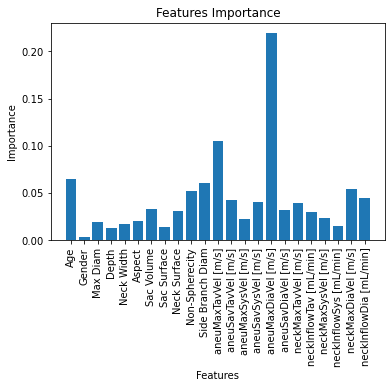

In [671]:
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Features'); plt.title('Features Importance')

**DTs:**

In [510]:
#build model
tree_reg = DecisionTreeRegressor(max_depth=10,random_state=30,min_samples_leaf=5)
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=30)

In [678]:
parameters = {'splitter':('best','random')
            ,"max_depth":[*range(3,20)]
            ,'min_samples_leaf':[*range(3,20,2)]
            }
tree_reg = DecisionTreeRegressor(random_state=30)
GS = GridSearchCV(tree_reg, parameters, cv=10, scoring='neg_mean_squared_error')
GS.fit(x_train,y_train)
GS.best_params_

{'max_depth': 3, 'min_samples_leaf': 19, 'splitter': 'best'}

In [679]:
tree_reg = DecisionTreeRegressor(max_depth=3,random_state=30,min_samples_leaf=19,splitter='best')
tree_reg.fit(x_train, y_train)

tree_predictions=tree_reg.predict(x_train)
tree_score = tree_reg.score(x_train, y_train)
tree_mae=mean_absolute_error(y_train, tree_predictions)
tree_mse = mean_squared_error(y_train, tree_predictions)
tree_rmse=np.sqrt(tree_mse)

print('Decision Tree score： ', tree_score)
print('Mean Absolute Error:', tree_mae)
print('Mean Squared Error:', tree_mse)
print('Root Mean Squared Error:', tree_rmse)

Decision Tree score：  0.3449162684182854
Mean Absolute Error: 10.064749576696554
Mean Squared Error: 177.63899833569081
Root Mean Squared Error: 13.328128088208441


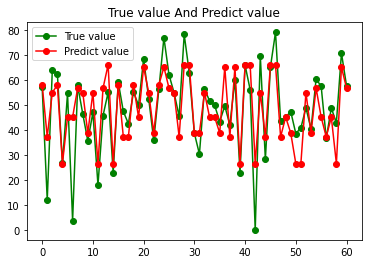

In [513]:
plt.figure()
plt.plot(np.arange(61), y_train, "go-", label="True value")
plt.plot(np.arange(61), tree_predictions, "ro-", label="Predict value")
plt.title("True value And Predict value")
plt.legend()

**SVM:**

In [477]:
#build model
svm_reg = SVR()
svm_reg.fit(x_train, y_train)

svm_predictions=svm_reg.predict(x_train)
svm_score = svm_reg.score(x_train, y_train)
svm_mae=mean_absolute_error(y_train, svm_predictions)
svm_mse = mean_squared_error(y_train, svm_predictions)
svm_rmse=np.sqrt(svm_mse)

print('SVM score:', svm_score)
print('Mean Absolute Error:', svm_mae)
print('Mean Squared Error:', svm_mse)
print('Root Mean Squared Error:', svm_rmse)

SVM score: 0.21493942780534947
Mean Absolute Error: 10.243287482959206
Mean Squared Error: 213.08695521457022
Root Mean Squared Error: 14.597498251911874


In [681]:
parameters = {'kernel':['rbf']
              , 'gamma':np.logspace(-5, 0, num=6, base=2.0)
              ,'C':np.logspace(-5, 5, num=11, base=2.0)
             }
svm_reg = SVR()
gs = GridSearchCV(svm_reg, parameters, cv=10, n_jobs=4,scoring='neg_mean_squared_error')
gs.fit(x_train,y_train)
gs.best_params_

{'C': 16.0, 'gamma': 0.03125, 'kernel': 'rbf'}

In [682]:
svm_reg = SVR(C=16,gamma=0.03125,kernel='rbf')
svm_reg.fit(x_train, y_train)

svm_predictions=svm_reg.predict(x_train)
svm_score = svm_reg.score(x_train, y_train)
svm_mae=mean_absolute_error(y_train, svm_predictions)
svm_mse = mean_squared_error(y_train, svm_predictions)
svm_rmse=np.sqrt(svm_mse)

print('SVM score:', svm_score)
print('Mean Absolute Error:', svm_mae)
print('Mean Squared Error:', svm_mse)
print('Root Mean Squared Error:', svm_rmse)

SVM score: 0.5967620749510253
Mean Absolute Error: 6.0912049018032395
Mean Squared Error: 109.34599295224152
Root Mean Squared Error: 10.45686343758211


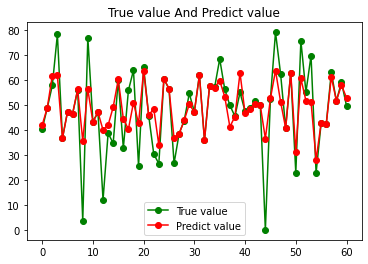

In [683]:
plt.figure()
plt.plot(np.arange(61), y_train, "go-", label="True value")
plt.plot(np.arange(61), svm_predictions, "ro-", label="Predict value")
plt.title("True value And Predict value")
plt.legend()


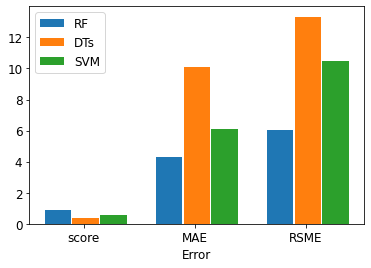

In [877]:
fig, ax = plt.subplots()

labels = ['score', 'MAE', 'RSME']
y1=[forest_score,forest_mae,forest_rsme]
y2=[tree_score,tree_mae,tree_rmse]
y3=[svm_score,svm_mae,svm_rmse]

plt.bar(x,y1,width=0.24,label = "RF")    
plt.bar(x+0.25,y2,width = 0.24,label = "DTs")
plt.bar(x+0.5,y3,width = 0.24,label = "SVM")

plt.xticks(x+0.7/3,x)
ax.set_xticklabels(labels)
plt.xlabel("Error",size = 12)

plt.legend()
plt.show()

# **Test:**

In [866]:
#test RF model
test_predictions=forest_reg.predict(x_test)
test_score = forest_reg.score(x_test, y_test)
test_mae=mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rsme=np.sqrt(test_mse)

print('Random Forest score： ', test_score)
print('Mean Absolute Error:', test_mae)
print('Mean Squared Error:', test_mse)
print('Root Mean Squared Error:', test_rsme)

Random Forest score：  0.44304073878671046
Mean Absolute Error: 9.380378062214763
Mean Squared Error: 196.63556831704142
Root Mean Squared Error: 14.022680496860842


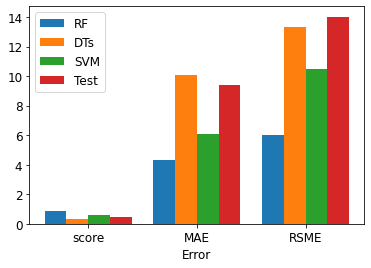

In [863]:
fig, ax = plt.subplots()

labels = ['score', 'MAE', 'RSME']
y1=[forest_score,forest_mae,forest_rsme]
y2=[tree_score,tree_mae,tree_rmse]
y3=[svm_score,svm_mae,svm_rmse]
y4=[test_score,test_mae,test_rsme]

plt.bar(x,y1,width=0.2,label = "RF")    
plt.bar(x+0.2,y2,width = 0.2,label = "DTs")
plt.bar(x+0.4,y3,width = 0.2,label = "SVM")
plt.bar(x+0.6,y4,width = 0.2,label = "Test")

plt.xticks(x+0.9/3,x) 
ax.set_xticklabels(labels)
plt.xlabel("Error",size = 12) 

plt.legend()
plt.show()

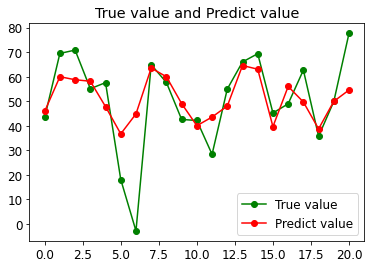

In [867]:
plt.figure()
plt.plot(np.arange(21), y_test, "go-", label="True value")
plt.plot(np.arange(21), test_predictions, "ro-", label="Predict value")
plt.title("True value and Predict value")
plt.legend()

In [875]:
#test RF model
svm_test_predictions=svm_reg.predict(x_test)
svm_test_score = svm_reg.score(x_test, y_test)
svm_test_mae=mean_absolute_error(y_test, svm_test_predictions)
svm_test_mse = mean_squared_error(y_test, svm_test_predictions)
svm_test_rsme=np.sqrt(svm_test_mse)

print('Random Forest score： ', svm_test_score)
print('Mean Absolute Error:', svm_test_mae)
print('Mean Squared Error:', svm_test_mse)
print('Root Mean Squared Error:', svm_test_rsme)

Random Forest score：  0.44483852671871427
Mean Absolute Error: 9.656105558256218
Mean Squared Error: 196.00085573330057
Root Mean Squared Error: 14.000030561870233


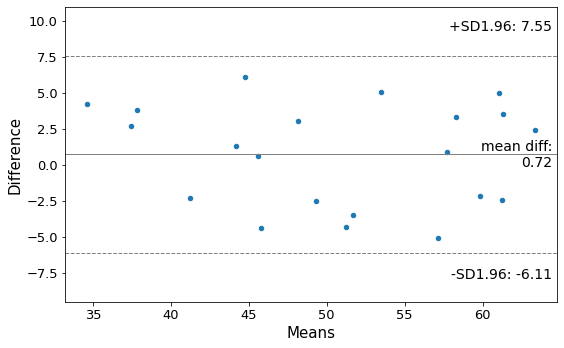

In [876]:
data1=test_predictions
data2=svm_test_predictions
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(data1, data2, ax = ax)

#display Bland-Altman plot
plt.show()